In [141]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import Imputer
from sklearn.tree import DecisionTreeClassifier

In [13]:
cData = pd.read_csv("concrete.csv")

In [14]:
# Dataframe without the target variable
cData_real = cData.drop(['strength'], axis=1)

# Exploratory Data Analytics

In [4]:
cData.shape

(1030, 9)

In [5]:
cData.head(20)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [6]:
cData.describe().transpose()
#No missing values as all the columns have 1030 entries.
#Target Variable in Stregth
#Slag, ash and superplasticilty have minimum values as 0, will check if it missing data or they can be zero

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## Univariate Analysis

### 5 Point Summary for cement

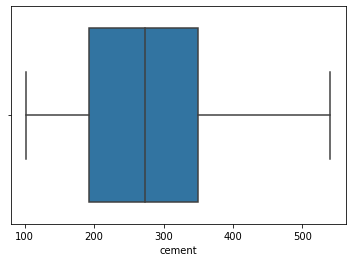

In [7]:
sns.boxplot(cData['cement'])
#right skewed with small tail, outliers might be present as we have a tail and not an ideal normal distribution

In [9]:
print("5 point summary for Cement")
print("* Median:" , cData['cement'].median())
cement_quartile1 = np.percentile(cData['cement'], 25)
print("* 1st Quartile" , cement_quartile1)
cement_quartile3 = np.percentile(cData['cement'], 75)
print("* 3rd Quartile" , cement_quartile3)
print("* Minimum value :" , cData['cement'].min())
print("* Maximum value :" , cData['cement'].max())
print("")

cement_iqr = cement_quartile3-cement_quartile1
print(cement_iqr)

5 point summary for Cement
* Median: 272.9
* 1st Quartile 192.375
* 3rd Quartile 350.0
* Minimum value : 102.0
* Maximum value : 540.0

157.625


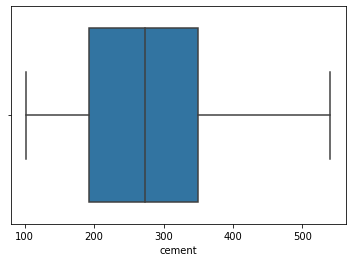

In [10]:
sns.boxplot(cData_real['cement'])

In [116]:
# Dealing with outliers
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df
#outlier_detect(cData)
outlier_detect(cData_real)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0
...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28.0
1026,531.3,0.0,0.0,141.8,6.4,852.1,893.7,3.0
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,28.0


### 5 Point Summary for Slag(Blast)

In [16]:
print("5 point summary for Slag")
print("* Median/Central Value:" , cData['slag'].median())
slag_quartile1 = np.percentile(cData['slag'], 25)
print("* 1st Quartile" , slag_quartile1)
slag_quartile3 = np.percentile(cData['slag'], 75)
print("* 3rd Quartile" , slag_quartile3)
print("* Minimum value :" , cData['slag'].min())
print("* Maximum value :" , cData['slag'].max())
print("")

5 point summary for Slag
* Median/Central Value: 22.0
* 1st Quartile 0.0
* 3rd Quartile 142.95
* Minimum value : 0.0
* Maximum value : 359.4



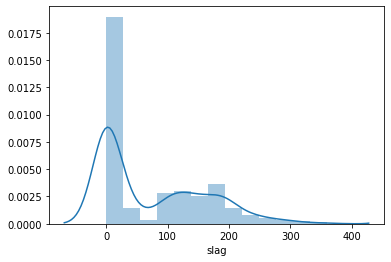

In [17]:
sns.distplot(cData['slag'])
#Not a normal distribution, extreme tail on the right, indication of two cluster.
#If I remove outliers then I will get a bias as too many values are spread on the right.

142.95


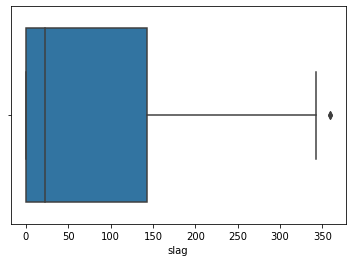

In [18]:
sns.boxplot(cData['slag'])
slag_iqr = slag_quartile3-slag_quartile1
print(slag_iqr)
#extremely left skewed and may be couple outlier.

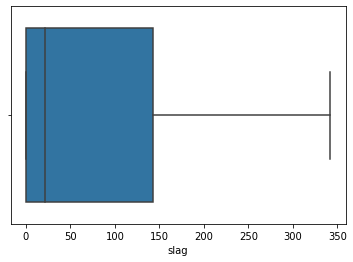

In [19]:
sns.boxplot(cData_real['slag']) #outliers replace in new Dataframe

In [20]:
#medianFiller_maxslag = lambda x: x.fillna(x.max())
#cData_real['slag'] = cData_real.apply(medianFiller_maxslag, axis=0)
#max_slag = cData_real['slag'].max()
#lambda x
#cData_real['slag'].fillna(cData_real['slag'].median(),inplace=True)
#print(cData_real[max_slag])
#if(cData_real['slag'].all()== max_slag):
    #cData_real['slag'] = cData_real['slag'].median()
#print(cData_real['slag'].max())    
#cData_real[cData_real['slag']
#cData_real.loc[cData_real['slag'].max()] = np.nan
#cData_real['slag'].fillna(cData_real['slag'].median(),inplace=True)
#cData_real['slag'].where(max).replace(cData_real['slag'].median)

In [21]:
#sns.distplot(cData_real['slag'])

### 5 Point Summary for Ash

In [22]:
print("5 point summary for Ash")
print("* Median:" , cData['ash'].median())
ash_quartile1 = np.percentile(cData['ash'], 25)
print("* 1st Quartile" , ash_quartile1)
ash_quartile3 = np.percentile(cData['ash'], 75)
print("* 3rd Quartile" , ash_quartile3)
print("* Minimum value :" , cData['ash'].min())
print("* Maximum value :" , cData['ash'].max())
print("")

5 point summary for Ash
* Median: 0.0
* 1st Quartile 0.0
* 3rd Quartile 118.3
* Minimum value : 0.0
* Maximum value : 200.1



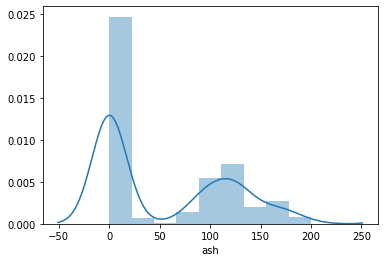

In [23]:
sns.distplot(cData['ash'])
#A lot of values that are 0, and then possible second cluster with tail on the right.
#Will check for outliers and right skew in the distributed cluster.

118.3


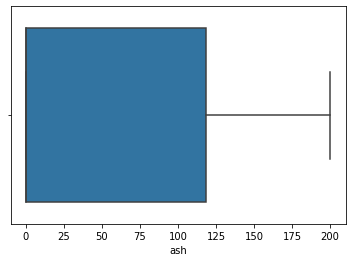

In [24]:
sns.boxplot(cData['ash'])
ash_iqr = ash_quartile3-ash_quartile1
print(ash_iqr)
# This suggests no outliers and right skewed!

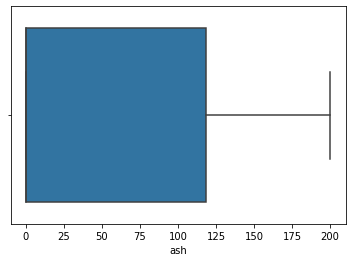

In [26]:
sns.boxplot(cData_real['ash'])

### 5 Point Summary for Water

In [27]:
print("5 point summary for Water")
print("* Median:" , cData['water'].median())
water_quartile1 = np.percentile(cData['water'], 25)
print("* 1st Quartile" , water_quartile1)
water_quartile3 = np.percentile(cData['water'], 75)
print("* 3rd Quartile" , water_quartile3)
print("* Minimum value :" , cData['water'].min())
print("* Maximum value :" , cData['water'].max())
print("")

5 point summary for Water
* Median: 185.0
* 1st Quartile 164.9
* 3rd Quartile 192.0
* Minimum value : 121.8
* Maximum value : 247.0



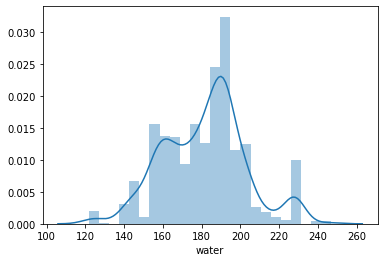

In [28]:
sns.distplot(cData['water'])

In [29]:
water_iqr = water_quartile3 - water_quartile1
print(water_iqr)
# Both tails are present.
# Possibility of removing outliers and making it a normal distribution.
# Will check that in other dataframe and verify

27.099999999999994


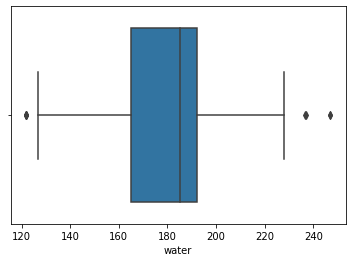

In [30]:
sns.boxplot(cData['water'])

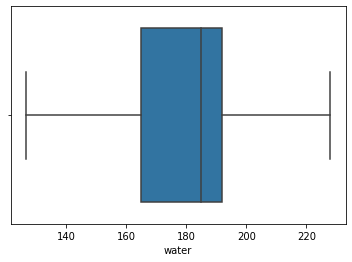

In [31]:
sns.boxplot(cData_real['water'])
#outliers removed

In [32]:
#x = (cData_water < (water_quartile1 - 1.5 * water_iqr)) |(cData_water > (water_quartile3 + 1.5 * water_iqr))

### 5 Point Summary for Superplasticizer

In [33]:
print("5 point summary for Superplasticizer")
print("* Median:" , cData['superplastic'].median())
superplastic_quartile1 = np.percentile(cData['superplastic'], 25)
print("* 1st Quartile" , superplastic_quartile1)
superplastic_quartile3 = np.percentile(cData['superplastic'], 75)
print("* 3rd Quartile" , superplastic_quartile3)
print("* Minimum value :" , cData['superplastic'].min())
print("* Maximum value :" , cData['superplastic'].max())
print("")

5 point summary for Superplasticizer
* Median: 6.4
* 1st Quartile 0.0
* 3rd Quartile 10.2
* Minimum value : 0.0
* Maximum value : 32.2



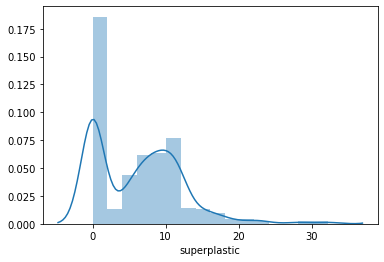

In [34]:
sns.distplot(cData['superplastic'])

10.2


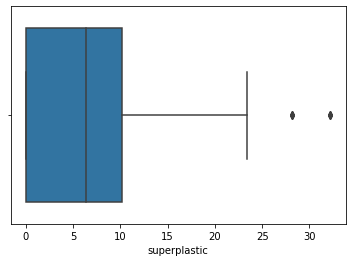

In [35]:
sns.boxplot(cData['superplastic'])
superplastic_iqr = superplastic_quartile3-superplastic_quartile1
print(superplastic_iqr)
#Some outliers are present
# long tail on the right, presence of many outliers or extreme values
# 2 clusters

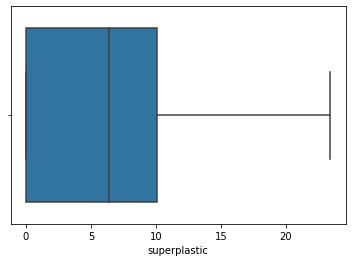

In [36]:
sns.boxplot(cData_real['superplastic'])
#Outliers removed using IQR
# Data is positively skewed

### 5 Point Summary for Coarse Aggregate

In [37]:
print("5 point summary for Coarse Aggregator")
print("* Median:" , cData['coarseagg'].median())
coarseagg_quartile1 = np.percentile(cData['coarseagg'], 25)
print("* 1st Quartile" , coarseagg_quartile1)
coarseagg_quartile3 = np.percentile(cData['coarseagg'], 75)
print("* 3rd Quartile" , coarseagg_quartile3)
print("* Minimum value :" , cData['coarseagg'].min())
print("* Maximum value :" , cData['coarseagg'].max())
print("")

5 point summary for Coarse Aggregator
* Median: 968.0
* 1st Quartile 932.0
* 3rd Quartile 1029.4
* Minimum value : 801.0
* Maximum value : 1145.0



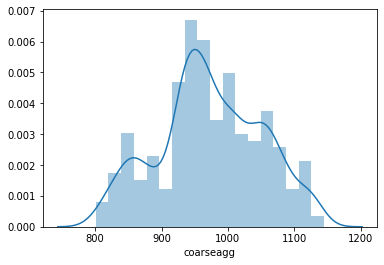

In [38]:
sns.distplot(cData['coarseagg'])

97.40000000000009


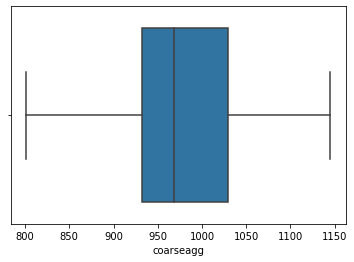

In [39]:
sns.boxplot(cData['coarseagg'])
coarseagg_iqr = coarseagg_quartile3-coarseagg_quartile1
print(coarseagg_iqr)
#No outliers 

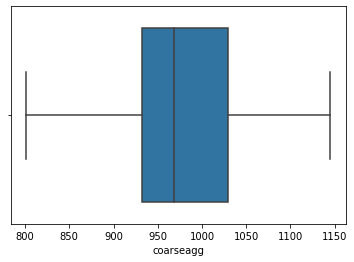

In [40]:
sns.boxplot(cData_real['coarseagg'])

### 5 Point Summary for Fine Aggregate

In [41]:
print("5 point summary for Fine Aggregator")
print("* Median:" , cData['fineagg'].median())
fineagg_quartile1 = np.percentile(cData['fineagg'], 25)
print("* 1st Quartile" , fineagg_quartile1)
fineagg_quartile3 = np.percentile(cData['fineagg'], 75)
print("* 3rd Quartile" , fineagg_quartile3)
print("* Minimum value :" , cData['fineagg'].min())
print("* Maximum value :" , cData['fineagg'].max())
print("")

5 point summary for Fine Aggregator
* Median: 779.5
* 1st Quartile 730.9499999999999
* 3rd Quartile 824.0
* Minimum value : 594.0
* Maximum value : 992.6



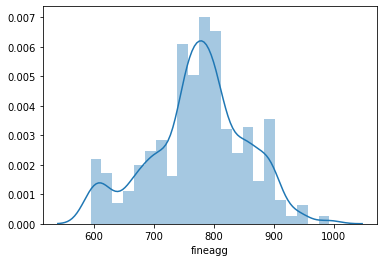

In [42]:
sns.distplot(cData['fineagg'])

93.05000000000007


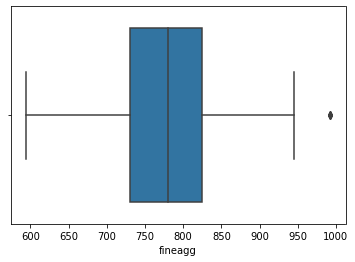

In [43]:
sns.boxplot(cData['fineagg'])
fineagg_iqr = fineagg_quartile3-fineagg_quartile1
print(fineagg_iqr)

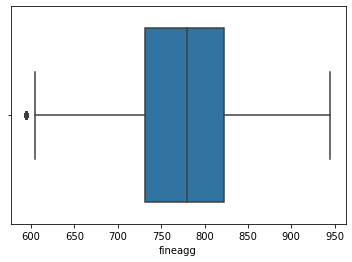

In [44]:
sns.boxplot(cData_real['fineagg']) 
# I am seeing new outliers or another cluster after remooving earlier outlier.
# Will check possibility of multiple clusters 

### 5 Point Summary for Age

In [45]:
print("5 point summary for Age")
print("* Median:" , cData['age'].median())
age_quartile1 = np.percentile(cData['age'], 25)
print("* 1st Quartile" , age_quartile1)
age_quartile3 = np.percentile(cData['age'], 75)
print("* 3rd Quartile" , age_quartile3)
print("* Minimum value :" , cData['age'].min())
print("* Maximum value :" , cData['age'].max())
print("")

5 point summary for Age
* Median: 28.0
* 1st Quartile 7.0
* 3rd Quartile 56.0
* Minimum value : 1
* Maximum value : 365



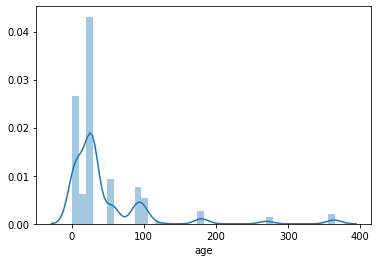

In [46]:
sns.distplot(cData['age'])

49.0


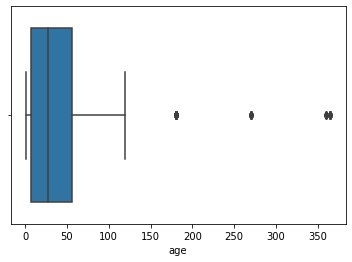

In [47]:
sns.boxplot(cData['age'])
age_iqr = age_quartile3-age_quartile1
print(age_iqr)
# Many Outliers possible
# extreme values, could be error or mis-representation
# Data has long tails at the right end

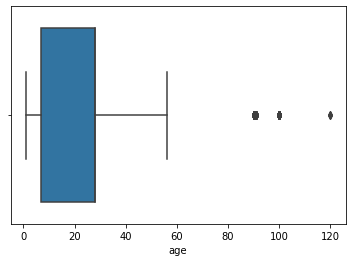

In [48]:
sns.boxplot(cData_real['age'])
# Data is positively skewed in this case
#

In [49]:
cData.dtypes
#All the attributes have float and int but the dtype is shown as Object. Will need to check that.

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [50]:
cData.info()
# Only float and int variables
# No missing values
# 0 is to be taken as it is

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


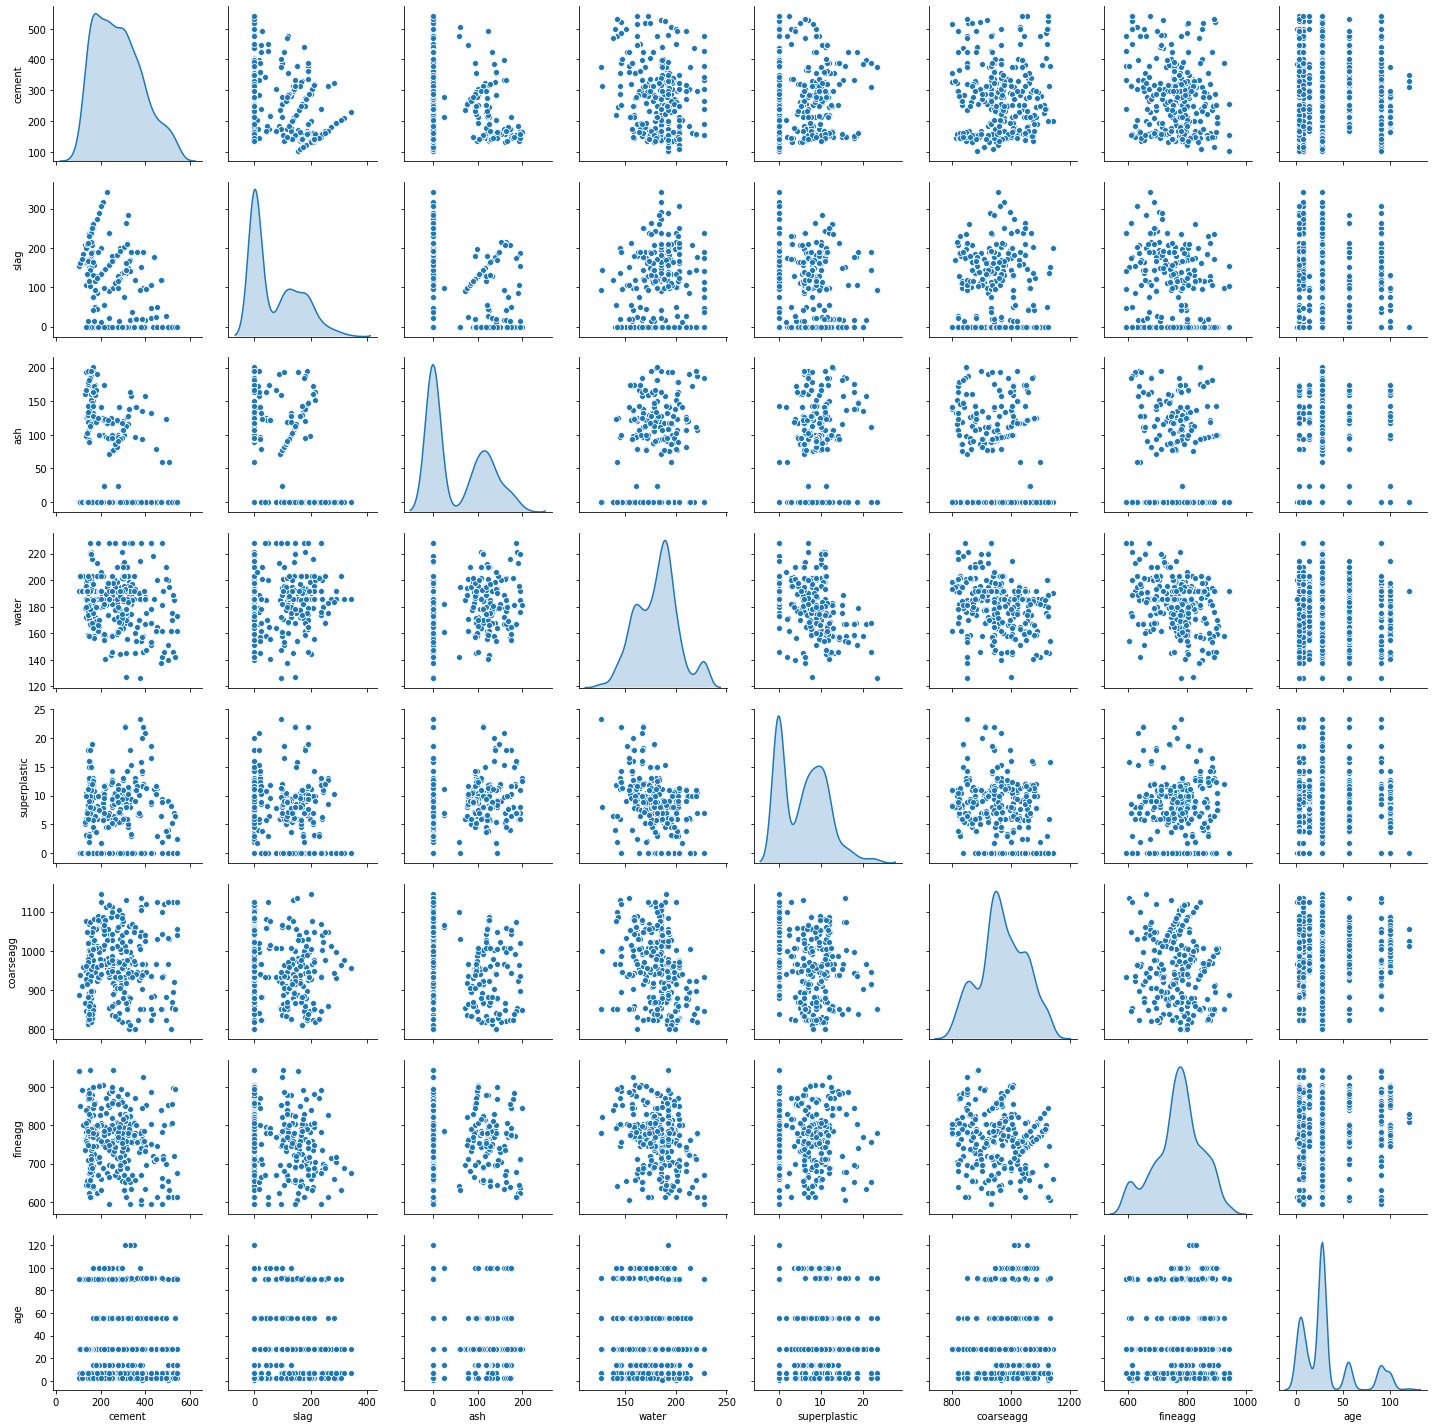

In [52]:
sns.pairplot(cData_real,diag_kind='kde') #pair plot without the target variable on Data with EDA

# Insights based on the pair plot
1 - Checking the diagonals:
  - Possibility of 2 clusters minimum

2 - Checking the plots below diagonal!
  - Slag and cement show positive linear relationship with 3 different clusters
  - There is also some correlation between slag and ash, possibility of multiple clusters 
  - Water looks really independent, will need to verify 
  - There is a relationship between fine aggregator and coarse aggregator

3 - Analysis with Target Variable
  - Strength and cement could have a positive linear relationship
  - Rest other plots don't show much info about the relationship with Strength.

In [53]:
print("Measuring the Skewness of each attribute")
print("Cement Skew =", cData['cement'].skew())
print("Slag Skew =", cData['slag'].skew())
print("Ash Skew =", cData['ash'].skew())
print("Water Skew =", cData['water'].skew())
print("Superplasticity Skew =", cData['superplastic'].skew())
print("Coarse Aggregator Skew =", cData['coarseagg'].skew())
print("Fine Aggregator Skew =", cData['fineagg'].skew())
print("Age Skew =", cData['age'].skew())

Measuring the Skewness of each attribute
Cement Skew = 0.5094811788717731
Slag Skew = 0.8007168956061774
Ash Skew = 0.5373539058066844
Water Skew = 0.07462838428549402
Superplasticity Skew = 0.9072025748672466
Coarse Aggregator Skew = -0.04021974481106704
Fine Aggregator Skew = -0.25300959769707143
Age Skew = 3.2691774006345895


## Deliverable -2 (Feature Engineering techniques)

#### a. Identify opportunities (if any) to create a composite feature, drop a feature
#### b. Decide on complexity of the model, should it be simple linear mode in terms of parameters or would a quadratic or higher degree help
#### c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength

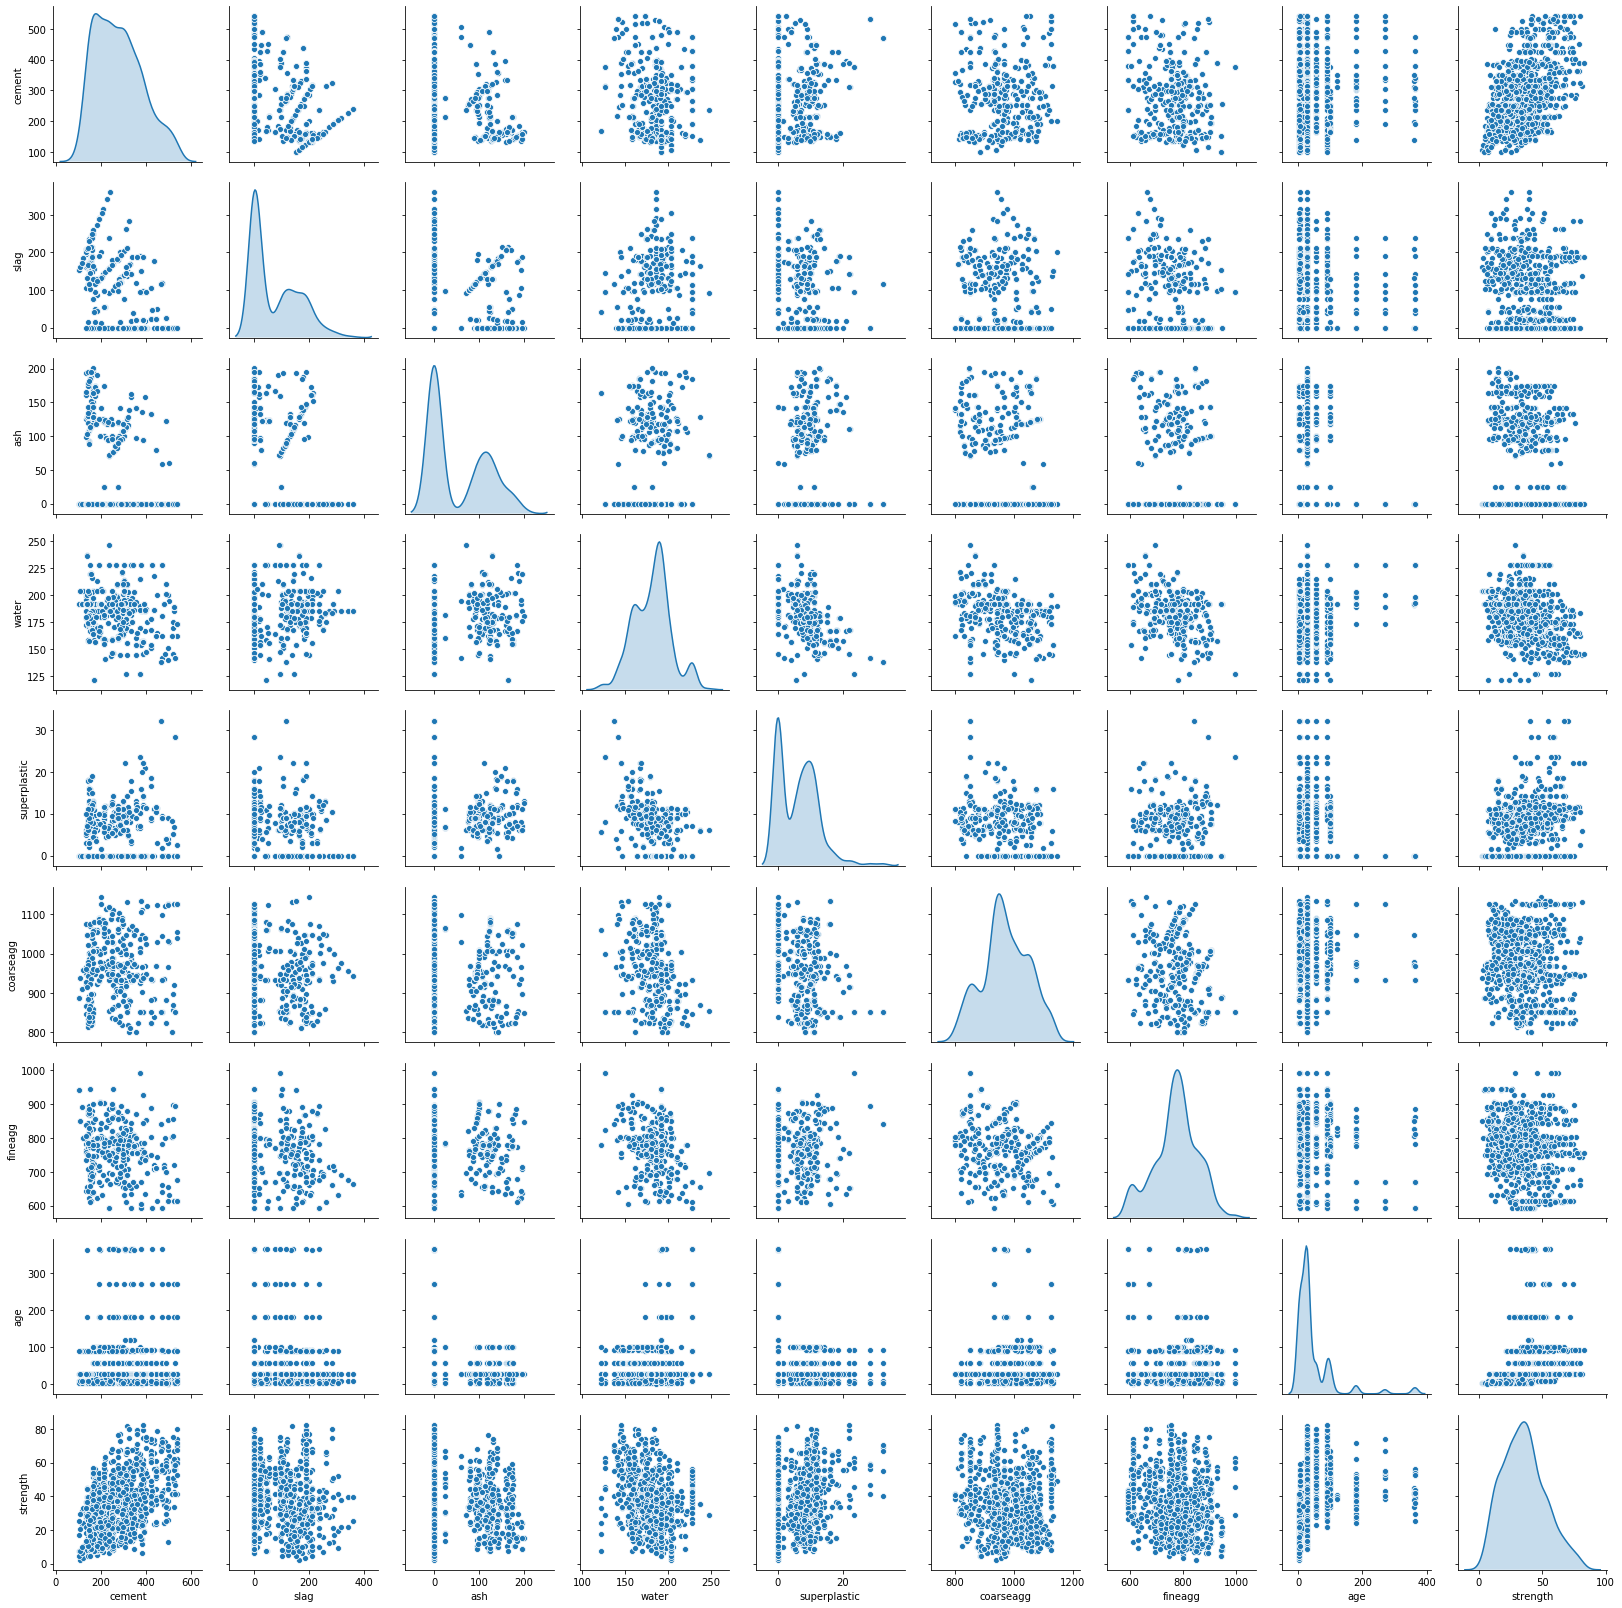

In [55]:
#Looking at the diagonals in the pair plot I can see that there are minimum 2 clusters in slag and 3 clsuters in age.
sns.pairplot(cData,diag_kind='kde')

### Checking Correlation if any between the columns

In [57]:
corr_real = cData_real.corr()
print(corr_real)
# Negative correlation between Water and superplasticity -0.65
corr = cData.corr()
print(corr)

                cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275046 -0.397467 -0.091614      0.013336  -0.109349   
slag         -0.275046  1.000000 -0.320468  0.098880      0.061195  -0.283882   
ash          -0.397467 -0.320468  1.000000 -0.248011      0.447492  -0.009961   
water        -0.091614  0.098880 -0.248011  1.000000     -0.658056  -0.156928   
superplastic  0.013336  0.061195  0.447492 -0.658056      1.000000  -0.224503   
coarseagg    -0.109349 -0.283882 -0.009961 -0.156928     -0.224503   1.000000   
fineagg      -0.238698 -0.282383  0.091729 -0.426299      0.156591  -0.161377   
age          -0.031962 -0.028971  0.057928 -0.040304      0.062013   0.018078   

               fineagg       age  
cement       -0.238698 -0.031962  
slag         -0.282383 -0.028971  
ash           0.091729  0.057928  
water        -0.426299 -0.040304  
superplastic  0.156591  0.062013  
coarseagg    -0.161377  0.018078  
fineagg       1.000000  0

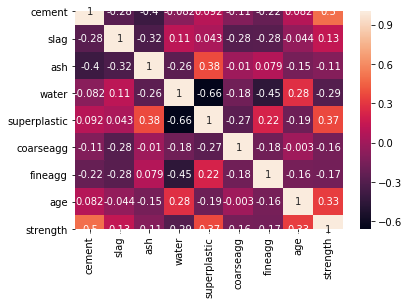

In [58]:
sns.heatmap(corr, annot=True)

#### Ash and cement have a negative corelation of -0.4. Next biggest correlation is water and fine-aggregator with -0.34. Superplasticity and ash has a positive correlation of 0.45 . Strength is related to Cement by 0.5

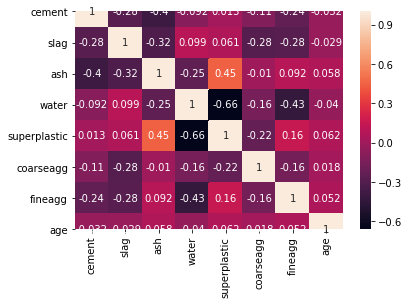

In [59]:
sns.heatmap(corr_real, annot=True)

### a. Identify opportunities (if any) to create a composite feature, drop a feature

In [60]:
#Lets try to create new features using the correlation analysis
# Superplasticity per kg water
cDatareal_attr = cData.iloc[:, 0:9]
cDatareal_attr['superwater'] = cDatareal_attr['superplastic'] / cDatareal_attr['water'] *1000 
# multiplying with 1000 just to adjust the decimal place
#cDatareal_attr['superwater'].head(50)

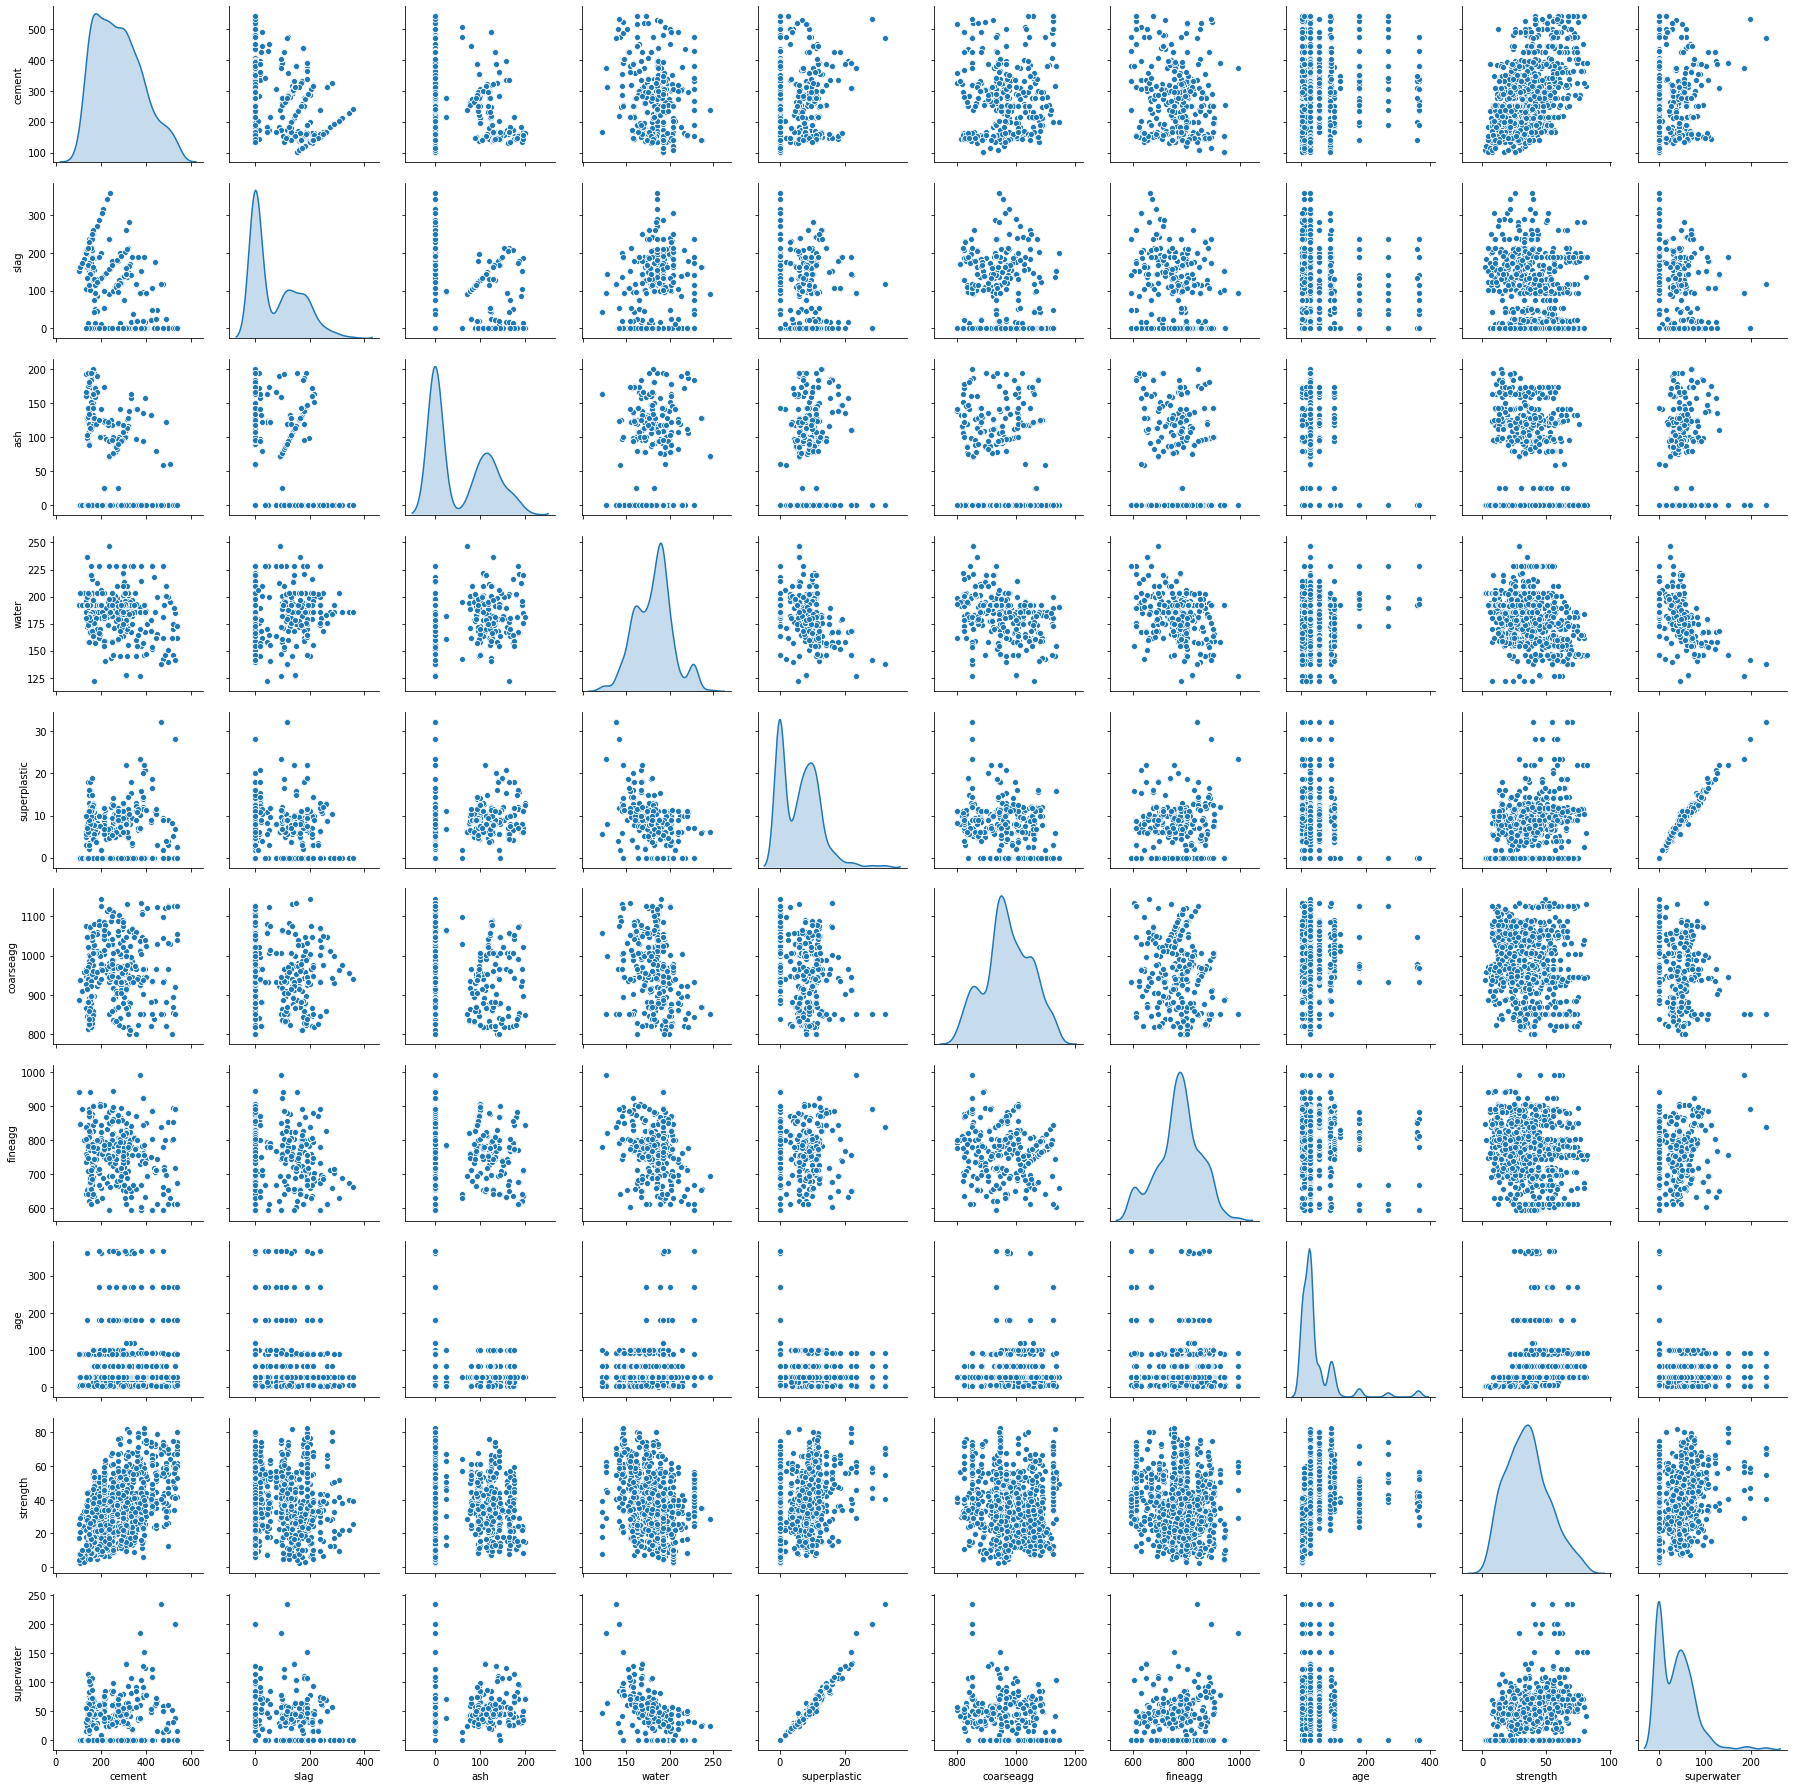

In [61]:
sns.pairplot(cDatareal_attr, diag_kind='kde')
# as we can see creating a new feature doesnt make much sense here as the predictibility power is not changed.

## Checking various model according to complexity

In [91]:
from scipy.stats import zscore
cDatareal_df = cData_real.loc[:, 'cement':'age'] #Dataframe without target variable
cDatareal_df_z = cDatareal_df.apply(zscore)      #Applying z score to independent variables

cData_df = cData.loc[:, 'cement':'strength']     #Dataframe with target variable
cData_df_z = cData_df.apply(zscore)              #Applying z score to all columns including target variable



array_real = cDatareal_df_z.values               #Array without target variable
array = cData_df_z.values

x = array_real[:,0:7]
y = array[:,8]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [92]:
#There is no definite linear relation hence we will need to choose a complex model. We will go with SVM
from sklearn import svm
clr = svm.SVR()
clr.fit(x_train, y_train)

C:\Users\antamra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [113]:
y_pred = clr.predict(x_test)

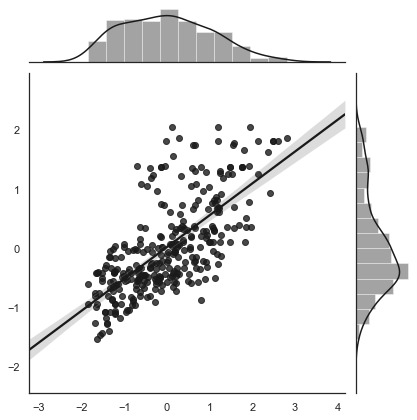

In [95]:
sns.set(style = "darkgrid", color_codes= True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color= "k", score='');

## K Means clustering

In [117]:
outlier_detect(cData_real)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.50,28.0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.20,14.0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.20,28.0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.00,28.0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.70,28.0
...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.00,28.0
1026,531.3,0.0,0.0,141.8,6.4,852.1,893.70,3.0
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.30,28.0
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.00,28.0


### c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength

In [118]:
# Let us explore the data for hidden clusters
from sklearn.cluster import KMeans
cluster_range = range( 2, 7 )   # expect 2 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(cData_df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

,num_clusters,cluster_errors
0,2,3.147325e+07
1,3,2.499578e+07
2,4,2.199491e+07
3,5,1.953573e+07
4,6,1.776297e+07


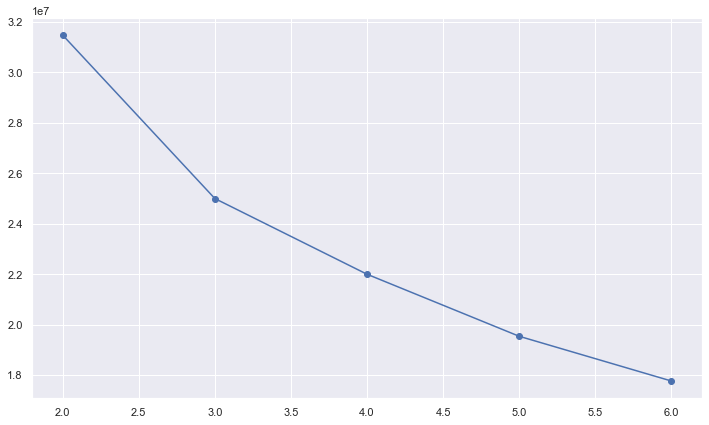

In [119]:
# Elbow plot
plt.figure(figsize=(12,7))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
# With this we can see that we have 3 clusters.

In [120]:
#I will make 3 clusters
from scipy.stats import zscore

cData_df = cData.loc[:,'cement':'strength'] #Dataframe without target variable
cData_df_z = cData_df.apply(zscore) 

cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(cData_df_z)

prediction=cluster.predict(cData_df_z)
cData_df_z["group"] = prediction     
# Creating a new column "GROUP" which will hold the cluster id of each record

cData_attr_z_copy = cData_df_z.copy(deep = True)  
# Creating a mirror copy for later re-use.

In [121]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.0536293 ,  0.1315908 , -0.79630495,  0.69179239, -0.87820168,
         0.25003637, -0.26851662,  0.24548169, -0.35620758],
       [-0.62375205, -0.42230513,  1.14094855, -0.29432634,  0.41340669,
         0.10321448,  0.23292867, -0.16690295, -0.24295822],
       [ 0.97789238,  0.47282031, -0.40192412, -0.8623689 ,  1.02559721,
        -0.67607356,  0.12838409, -0.19741904,  1.1299039 ]])

In [122]:
centroid_df = pd.DataFrame(centroids, columns = list(cData_df) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.053629,0.131591,-0.796305,0.691792,-0.878202,0.250036,-0.268517,0.245482,-0.356208
1,-0.623752,-0.422305,1.140949,-0.294326,0.413407,0.103214,0.232929,-0.166903,-0.242958
2,0.977892,0.472820,-0.401924,-0.862369,1.025597,-0.676074,0.128384,-0.197419,1.129904


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000258A7078388>,
      dtype=object)

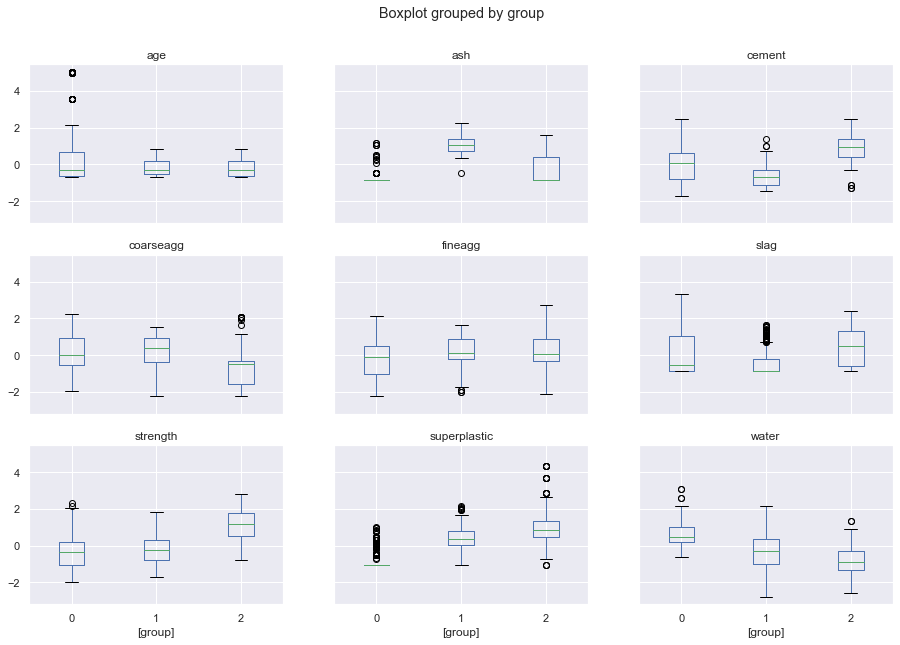

In [123]:
import matplotlib.pylab as plt
cData_df_z.boxplot(by = 'group',  layout=(3,3), figsize=(15, 10))
# Analysing using the box plots

In [125]:
# There are very less outliers in age, water, coarseagg and cement(indicated by the black circles)
# many outliers in ash, superplastic, slag and fine-aggregator
# Spread of data on each dimension (indicated by the whiskers is long ... due to the outliers)
# If the outliers are addressed, the clusters will overlap much less than right now, expect dimensions with no outlier.

In [126]:
# Addressing outliers at group level

group = cData_df_z
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 3*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

group_corrected = (group.groupby('group').transform(replace)) 

concat_data = group_corrected.join(pd.DataFrame(cData_df_z['group']))

C:\Users\antamra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000258A7A85EC8>,
      dtype=object)

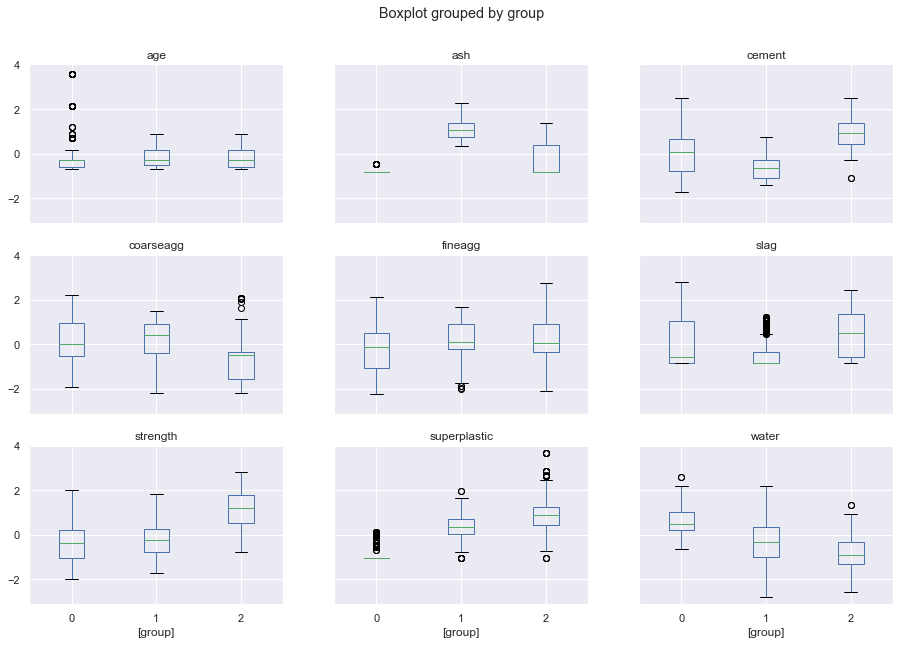

In [127]:
concat_data.boxplot(by = 'group', layout=(3,3), figsize=(15, 10))

In [128]:
# checking the same outliers after applying the 3 std values to the outliers
#group = cDatareal_df_z
       
#def replace(group,std):
#    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
#    outliers = (group - median).abs() > 3*std # Subtract median from every member of each group. Take absolute values > 2std
#    group[outliers] = group.std(3)       
#    return group

#group_corrected = (group.groupby('group').transform(replace)) 
#concat_data = group_corrected.join(pd.DataFrame(cDatareal_df_z['group']))

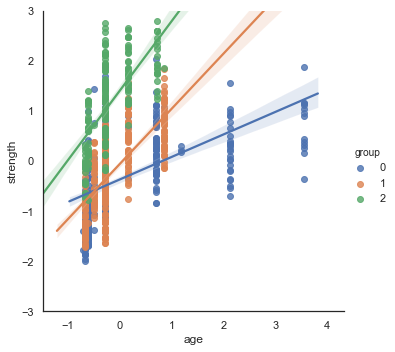

In [129]:
# Analysing the strength with other columns group wise.
# Checking for multiple clusters where we could possible clusters in the pairplot
# Should Show us 3 different dimensions affecting the target variable.
# strength Vs age
var = 'age'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='group')
plot.set(ylim = (-3,3))

In [130]:
# Analysis of the above plot 
# Age has 3 separate clusters affecting individually
# Larger the age larger the strength
# as we can see from hegreen plot

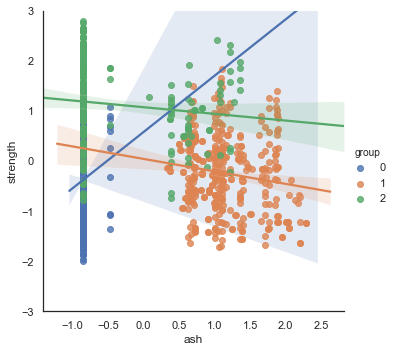

In [131]:
# strength vs ash
# we should probably get 2 clusters
var = 'ash'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='group')
plot.set(ylim = (-3,3))
# Group 1 is horizontal and doesn't seem to have much effect on Strength
# Group 0 is falling down but is still horizantal, doesn't have high influence

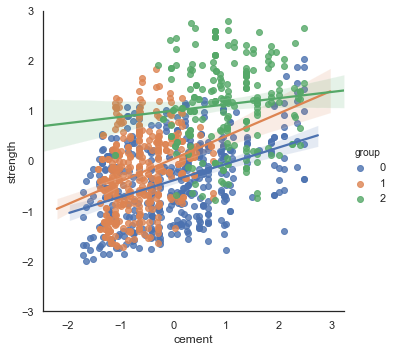

In [132]:
# strength Vs cement
# Separate clusters are not needed for this but a positive relationship can be expected
var = 'cement'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='group')
plot.set(ylim = (-3,3))
# All the clusters have some linear relation

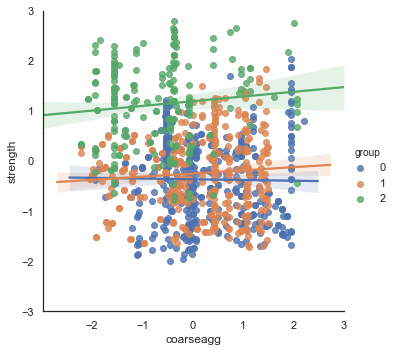

In [133]:
# strength Vs coarse Aggregate
# I am expecting 2 clusters
var = 'coarseagg'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='group')
plot.set(ylim = (-3,3))
# Almost all the clusters do not have much influence on strength
# We can may be drop this attribute
# Unexpectedly flat curve

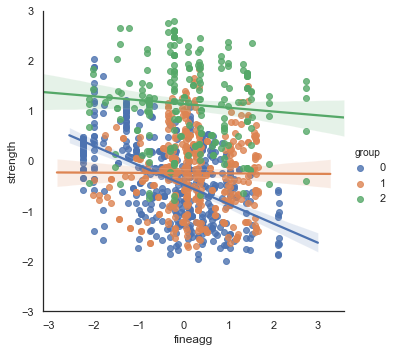

In [134]:
# strength Vs fine aggregator
# no clustered expected
var = 'fineagg'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='group')
plot.set(ylim = (-3,3))
# Group 0 and 1 do not have any influence
# While group 2 might have a negative relation

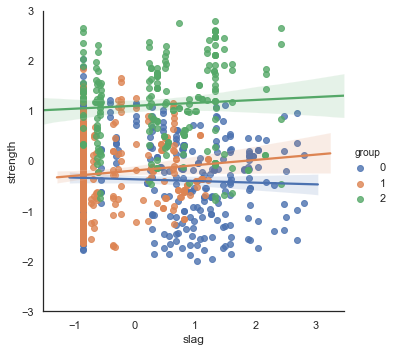

In [135]:
# strength Vs Slag
# 2 influencing clusters maybe
var = 'slag'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='group')
plot.set(ylim = (-3,3))
# Even slag doesn't seem to have much influence on Strength

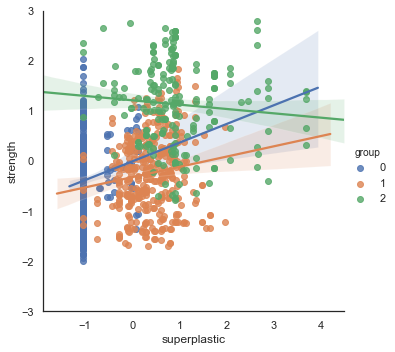

In [136]:
# strength Vs superplasticity
# 2 influencing clusters expected
var = 'superplastic'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='group')
plot.set(ylim = (-3,3))
# for group 0 and 2 we have some positive relation
# for group 1 the plot is negative and somewhat flat, meaning not so much influence

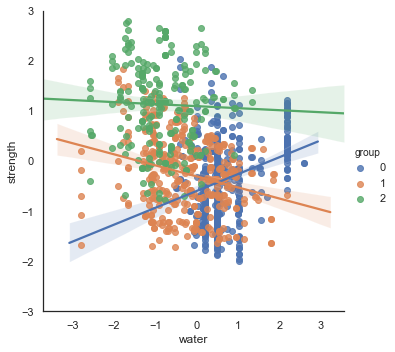

In [137]:
# strength vs water
# 3 clusters expected
var = 'water'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='group')
plot.set(ylim = (-3,3))
# group 1 water doesn't influence but froup 0 and 2 do.
# this is similar to the plot of super-plasticity

Breaking the clusters into individual features doesn't seem suitable here,
as I do not know which primary column should be broken down.
I will move on to model building

## 2 - Creating a model

In [143]:
# Starting with decision tree as I don't see linear models working well.

cDatareal_df = cData_real.loc[:, 'cement':'age'] #Dataframe without target variable
cDatareal_df_z = cDatareal_df.apply(zscore)      #Applying z score to independent variables

cData_df = cData.loc[:, 'cement':'strength']     #Dataframe with target variable
cData_df_z = cData_df.apply(zscore)              #Applying z score to all columns including target variable

array_real = cDatareal_df_z.values               #Array without target variable
array = cData_df_z.values

x = array_real[:,0:7]
y = array[:,8]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [152]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0,max_depth=3)
regressor.fit(x_train,y_train)
feature_importance = regressor.feature_importances_

feature_names= cData_df.columns[1:10]
print(feature_names)
k = 9
top_k_idx = (feature_importance.argsort()[-k:][::-1])
print(feature_names[top_k_idx], feature_importance)

Index(['slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age',
       'strength'],
      dtype='object')
Index(['slag', 'superplastic', 'age', 'water', 'fineagg', 'coarseagg', 'ash'], dtype='object') [0.55630011 0.         0.049671   0.32325437 0.         0.
 0.07077451]


In [153]:
# Decision tree shows that Cement and water are the most important features

## Ridge and Lasso

In [159]:
from sklearn import preprocessing

X = cData_df.drop('strength', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = cData_df[['strength']]
# scale all the columns of the mpg_df. This will produce a numpy array
x_scaled = preprocessing.scale(x)
x_scaled = pd.DataFrame(x_scaled, axis=1)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns = y.columns)  # ideally the training and test should be 

TypeError: __init__() got an unexpected keyword argument 'axis'